### Load Functions

In [1]:
import pandas as pd

from simple_trade import download_data, compute_indicator
from simple_trade import BandTradeBacktester
from simple_trade import BacktestPlotter

# Set pandas display options for better output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Load Backtest Configuration

In [2]:
# --- Configuration ---
ticker = 'SPY'
start_date = '2020-01-01'
end_date = '2024-12-31'
rsi_window = 14
rsi_upper_threshold = 80
rsi_lower_threshold = 20
long_entry_pct_cash = 1
short_entry_pct_cash = 0.5
initial_cash = 10000.0
commission = 0.0

### Load Data and Indicators

In [3]:
data = download_data(ticker, start_date, end_date)
data.head(5)

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,300.291534,324.869995,324.890015,322.529999,323.540009,59151200
2020-01-03,298.017639,322.410004,323.640015,321.100006,321.160004,77709700
2020-01-06,299.154572,323.640015,323.730011,320.359985,320.489990,55653900
2020-01-07,298.313538,322.730011,323.540009,322.239990,323.019989,40496400
2020-01-08,299.903412,324.450012,325.779999,322.670013,322.940002,68296000


Computing RSI...


Price,Adj Close,Close,High,Low,Open,Volume,RSI_14,RSI_Upper,RSI_Lower
Date,,,,,,,,,
2024-12-23,592.906433,594.690002,595.299988,587.659973,590.890015,57635800,40.903748,80,20
2024-12-24,599.496582,601.299988,601.340027,595.469971,596.059998,33160100,44.060534,80,20
2024-12-26,599.536499,601.340027,602.479980,598.080017,599.500000,41219100,44.941101,80,20
2024-12-27,593.225464,595.010010,597.780029,590.760010,597.539978,64969300,38.919692,80,20
2024-12-30,586.455811,588.219971,591.739990,584.409973,587.890015,56578800,36.600461,80,20


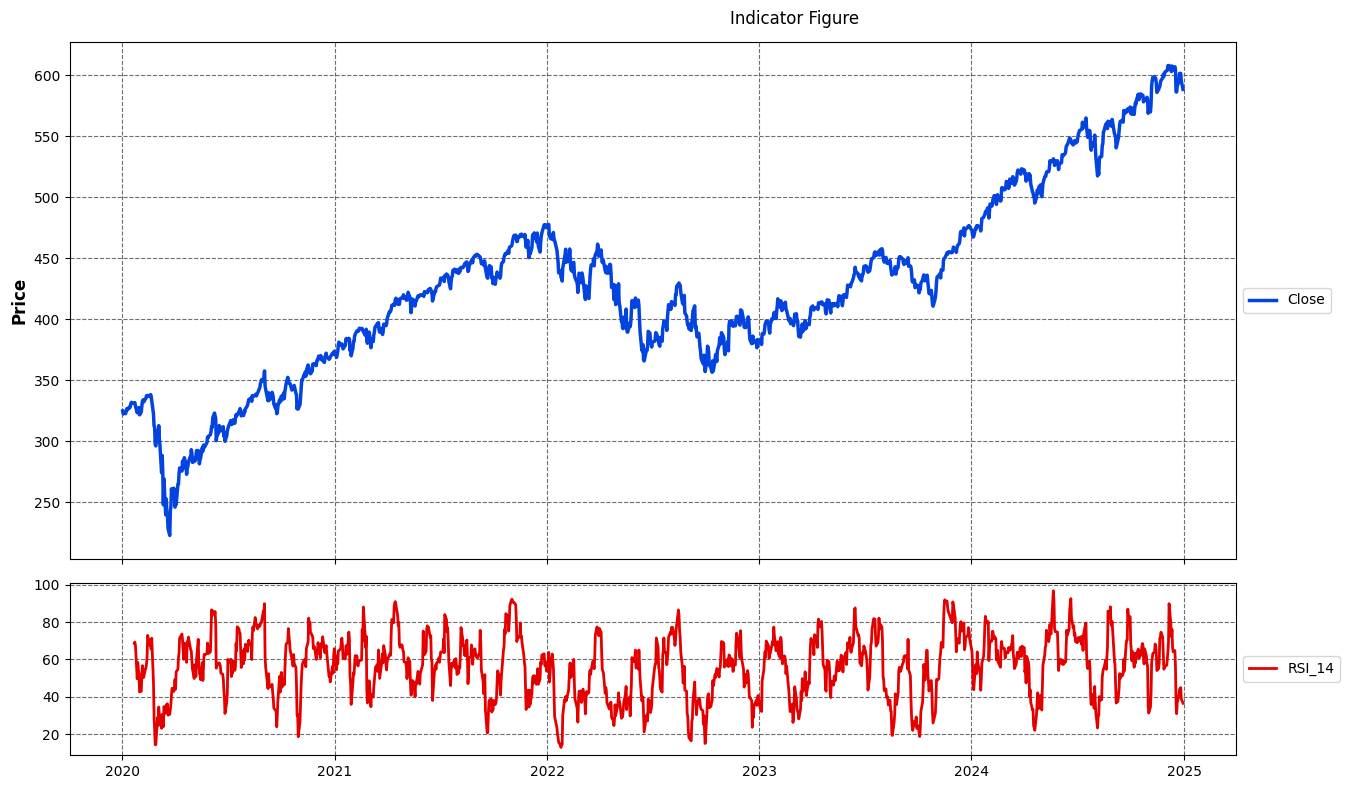

In [4]:
parameters = dict()
columns = dict()
parameters["window"] = rsi_window
columns["close_col"] = 'Close'
data, columns, fig = compute_indicator(
    data=data,
    indicator='rsi',
    parameters=parameters,
    columns=columns
)

indicator_col = f'RSI_{rsi_window}'
# Add constant columns for the fixed RSI thresholds
upper_threshold_col = 'RSI_Upper'
lower_threshold_col = 'RSI_Lower'
data[upper_threshold_col] = rsi_upper_threshold
data[lower_threshold_col] = rsi_lower_threshold
data.tail(5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-01-02 to 2024-12-30
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1257 non-null   float64
 1   Close      1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Open       1257 non-null   float64
 5   Volume     1257 non-null   int64  
 6   RSI_14     1244 non-null   float64
 7   RSI_Upper  1257 non-null   int64  
 8   RSI_Lower  1257 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 98.2 KB


### Long Only Trading Backtest

In [6]:
backtester = BandTradeBacktester(initial_cash=initial_cash, commission_long=commission, commission_short=commission)
results, portfolio = backtester.run_band_trade(
    data=data,
    indicator_col=indicator_col,
    upper_band_col='RSI_Upper',
    lower_band_col='RSI_Lower',
    price_col='Close',
    trading_type='long',
    long_entry_pct_cash = 1,
    short_entry_pct_cash = 0.5,
)

In [7]:
results

{'strategy': 'Band Trade (RSI_14 vs RSI_Lower/RSI_Upper - Mean Reversion)',
 'indicator_col': 'RSI_14',
 'upper_band_col': 'RSI_Upper',
 'lower_band_col': 'RSI_Lower',
 'strategy_type': 1,
 'initial_cash': 10000.0,
 'final_value': np.float64(11749.57),
 'total_return_pct': np.float64(17.5),
 'num_trades': np.int64(10),
 'total_short_fees': np.float64(0.0),
 'total_long_fees': np.float64(0.0),
 'total_borrow_fees': np.float64(0.0),
 'benchmark_strategy': 'Buy and Hold',
 'benchmark_initial_cash': 10000.0,
 'benchmark_shares': np.float64(30.180479599578128),
 'benchmark_buy_price': np.float64(331.3399963378906),
 'benchmark_final_price': np.float64(588.219970703125),
 'benchmark_final_value': np.float64(17752.76),
 'benchmark_return_pct': np.float64(77.53),
 'start_date': Timestamp('2020-01-22 00:00:00'),
 'end_date': Timestamp('2024-12-30 00:00:00'),
 'duration_days': 1804,
 'days_in_backtest': 1244,
 'years': 4.94,
 'annualized_return_pct': np.float64(3.32),
 'annualized_volatility_pct

In [8]:
backtester.print_results(results)


✨ Band Trade (RSI_14 vs RSI_Lower/RSI_Upper - Mean Reversion) ✨

🗓️ BACKTEST PERIOD:
  • Period: 2020-01-22 to 2024-12-30
  • Duration: 1804 days
  • Trading Days: 1244

📊 BASIC METRICS:
  • Initial Investment: $10,000.00
  • Final Portfolio Value: $11,749.57
  • Total Return: 17.50%
  • Annualized Return: 3.32%
  • Number of Trades: 10
  • Total Commissions: $0.00

📈 BENCHMARK COMPARISON:
  • Benchmark Return: 77.53%
  • Benchmark Final Value: $17,752.76
  • Strategy vs Benchmark: -60.03%

📉 RISK METRICS:
  • Sharpe Ratio: 0.280
  • Sortino Ratio: 0.150
  • Maximum Drawdown: -28.13%
  • Average Drawdown: -3.40%
  • Max Drawdown Duration: 517 days
  • Avg Drawdown Duration: 158.55 days
  • Annualized Volatility: 17.32%



In [9]:
portfolio.head(5)

,Price,Close,PositionSize,PositionValue,PositionType,PortfolioValue,CommissionPaid,ShortFee,LongFee,BuySignal,SellSignal,Action,daily_return,cum_max,drawdown,drawdown_start,drawdown_end
Date,,,,,,,,,,,,,,,,,
2020-01-22,331.339996,331.339996,0,0.0,none,10000.0,0.0,0.0,0.0,False,False,HOLD,NaN,10000.0,0.0,False,True
2020-01-23,331.720001,331.720001,0,0.0,none,10000.0,0.0,0.0,0.0,False,False,HOLD,0.0,10000.0,0.0,False,False
2020-01-24,328.769989,328.769989,0,0.0,none,10000.0,0.0,0.0,0.0,False,False,HOLD,0.0,10000.0,0.0,False,False
2020-01-27,323.500000,323.500000,0,0.0,none,10000.0,0.0,0.0,0.0,False,False,HOLD,0.0,10000.0,0.0,False,False
2020-01-28,326.890015,326.890015,0,0.0,none,10000.0,0.0,0.0,0.0,False,False,HOLD,0.0,10000.0,0.0,False,False


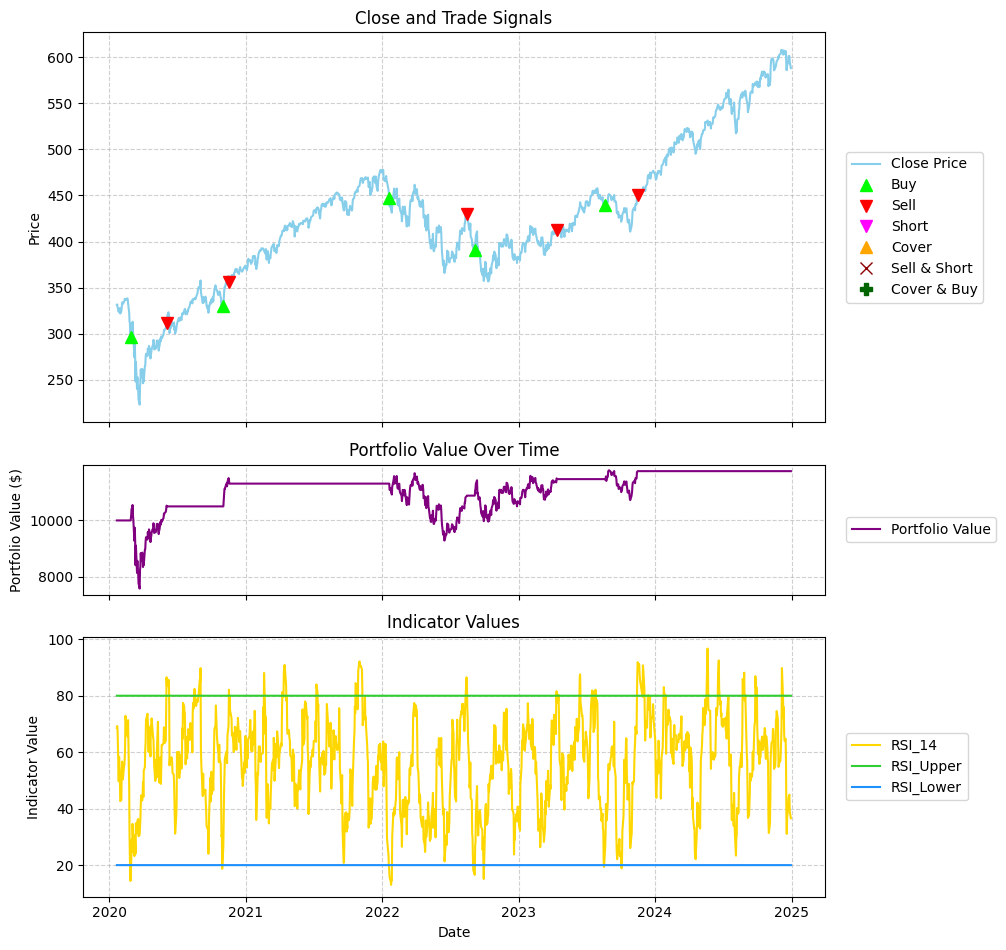

In [10]:
# Prepare results for plotting
plotter = BacktestPlotter()

# Define the indicator columns explicitly
indicator_cols_to_plot = [f'RSI_{rsi_window}', 'RSI_Upper', 'RSI_Lower']

fig = plotter.plot_results(
    data_df=data,
    history_df=portfolio,
    price_col='Close',
    indicator_cols=indicator_cols_to_plot, 
    title=f"RSI Threshold (Long Only) (RSI-{rsi_window} {rsi_lower_threshold}/{rsi_upper_threshold})"
)

### Short Only Trading Backtest

In [11]:
backtester = BandTradeBacktester(initial_cash=initial_cash, commission_long=commission, commission_short=commission)
results, portfolio = backtester.run_band_trade(
    data=data,
    indicator_col=indicator_col,
    upper_band_col='RSI_Upper',
    lower_band_col='RSI_Lower',
    price_col='Close',
    trading_type='short',
    long_entry_pct_cash = 1,
    short_entry_pct_cash = 0.5,
)

In [12]:
backtester.print_results(results)


✨ Band Trade (RSI_14 vs RSI_Lower/RSI_Upper - Mean Reversion) [Shorts Allowed] ✨

🗓️ BACKTEST PERIOD:
  • Period: 2020-01-22 to 2024-12-30
  • Duration: 1804 days
  • Trading Days: 1244

📊 BASIC METRICS:
  • Initial Investment: $10,000.00
  • Final Portfolio Value: $7,362.20
  • Total Return: -26.38%
  • Annualized Return: -6.01%
  • Number of Trades: 9
  • Total Commissions: $0.00

📈 BENCHMARK COMPARISON:
  • Benchmark Return: 77.53%
  • Benchmark Final Value: $17,752.76
  • Strategy vs Benchmark: -103.91%

📉 RISK METRICS:
  • Sharpe Ratio: -0.920
  • Sortino Ratio: -1.300
  • Maximum Drawdown: -29.42%
  • Average Drawdown: -15.28%
  • Max Drawdown Duration: 1645 days
  • Avg Drawdown Duration: 555.0 days
  • Annualized Volatility: 6.51%



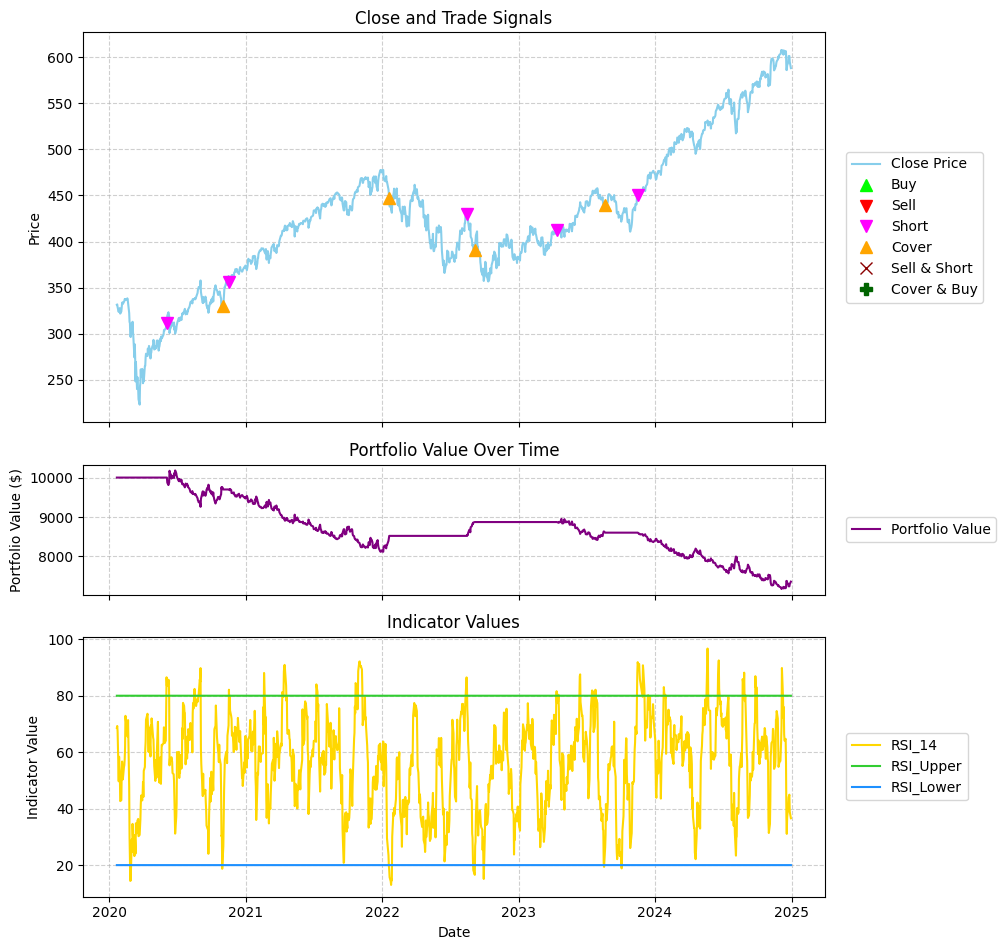

In [13]:
# Prepare results for plotting
plotter = BacktestPlotter()

# Define the indicator columns explicitly
indicator_cols_to_plot = [f'RSI_{rsi_window}', 'RSI_Upper', 'RSI_Lower']

fig = plotter.plot_results(
    data_df=data,
    history_df=portfolio,
    price_col='Close',
    indicator_cols=indicator_cols_to_plot, 
    title=f"RSI Threshold (Short Only) (RSI-{rsi_window} {rsi_lower_threshold}/{rsi_upper_threshold})"
)

### Mixed Trading Backtest

In [14]:
backtester = BandTradeBacktester(initial_cash=initial_cash, commission_long=commission, commission_short=commission)
results, portfolio = backtester.run_band_trade(
    data=data,
    indicator_col=indicator_col,
    upper_band_col='RSI_Upper',
    lower_band_col='RSI_Lower',
    price_col='Close',
    trading_type='mixed',
    long_entry_pct_cash = 1,
    short_entry_pct_cash = 0.5,
)

In [15]:
portfolio.loc[portfolio["Action"]!="HOLD",:]

,Price,Close,PositionSize,PositionValue,PositionType,PortfolioValue,CommissionPaid,ShortFee,LongFee,BuySignal,SellSignal,Action,daily_return,cum_max,drawdown,drawdown_start,drawdown_end
Date,,,,,,,,,,,,,,,,,
2020-02-28,296.260010,296.260010,33,9776.580322,long,10000.000000,0.0,0.0,0.0,True,False,BUY,0.000000,10000.000000,0.000000,False,False
2020-06-04,311.359985,311.359985,-16,4981.759766,short,10498.299194,0.0,0.0,0.0,False,True,SELL AND SHORT,-0.002571,10547.799194,-0.469292,False,False
2020-11-02,330.200012,330.200012,30,9906.000366,long,10196.858765,0.0,0.0,0.0,True,False,COVER AND BUY,-0.005710,10679.259155,-4.517171,False,False
2020-11-18,356.279999,356.279999,-15,5344.199982,short,10979.258362,0.0,0.0,0.0,False,True,SELL AND SHORT,-0.011720,11167.958618,-1.689658,False,False
2022-01-20,446.750000,446.750000,21,9381.750000,long,9622.208344,0.0,0.0,0.0,True,False,COVER AND BUY,0.007856,11167.958618,-13.840938,False,False
2022-08-16,429.700012,429.700012,-10,4297.000122,short,9264.158600,0.0,0.0,0.0,False,True,SELL AND SHORT,0.001908,11167.958618,-17.046983,False,False
2022-09-06,390.760010,390.760010,24,9378.240234,long,9653.558624,0.0,0.0,0.0,True,False,COVER AND BUY,0.001535,11167.958618,-13.560222,False,False
2023-04-14,412.459991,412.459991,-12,4949.519897,short,10174.358185,0.0,0.0,0.0,False,True,SELL AND SHORT,-0.002377,11167.958618,-8.896885,False,False
2023-08-21,439.339996,439.339996,22,9665.479919,long,9851.798126,0.0,0.0,0.0,True,False,COVER AND BUY,-0.003447,11167.958618,-11.785148,False,False


In [16]:
backtester.print_results(results)


✨ Band Trade (RSI_14 vs RSI_Lower/RSI_Upper - Mean Reversion) [Shorts Allowed] ✨

🗓️ BACKTEST PERIOD:
  • Period: 2020-01-22 to 2024-12-30
  • Duration: 1804 days
  • Trading Days: 1244

📊 BASIC METRICS:
  • Initial Investment: $10,000.00
  • Final Portfolio Value: $8,573.49
  • Total Return: -14.27%
  • Annualized Return: -3.07%
  • Number of Trades: 1
  • Total Commissions: $0.00

📈 BENCHMARK COMPARISON:
  • Benchmark Return: 77.53%
  • Benchmark Final Value: $17,752.76
  • Strategy vs Benchmark: -91.80%

📉 RISK METRICS:
  • Sharpe Ratio: -0.080
  • Sortino Ratio: -0.210
  • Maximum Drawdown: -29.05%
  • Average Drawdown: -13.26%
  • Max Drawdown Duration: 1504 days
  • Avg Drawdown Duration: 218.88 days
  • Annualized Volatility: 18.48%



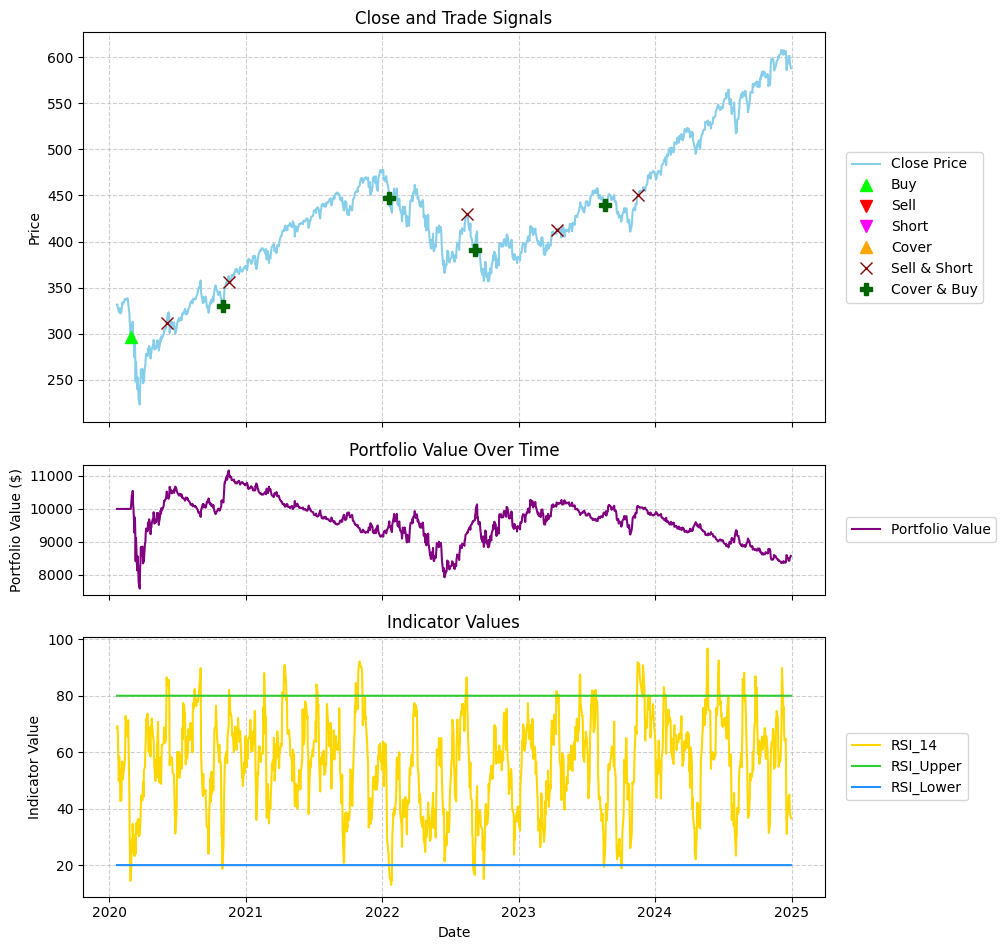

In [17]:
# Prepare results for plotting
plotter = BacktestPlotter()

# Define the indicator columns explicitly
indicator_cols_to_plot = [f'RSI_{rsi_window}', 'RSI_Upper', 'RSI_Lower']

fig = plotter.plot_results(
    data_df=data,
    history_df=portfolio,
    price_col='Close',
    indicator_cols=indicator_cols_to_plot, 
    title=f"RSI Threshold (Mixed Trading) (RSI-{rsi_window} {rsi_lower_threshold}/{rsi_upper_threshold})"
)